# Predicting heart disease using machine learning

This notebook look into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1.Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/code

## 3.Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4.Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute) 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data anlysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# we want our plots to appear inside the notebook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## **Load Data**

In [2]:
df = pd.read_csv("datas/heart-disease.csv")
df.shape # Rows, Columns

(303, 14)

## Data Exploration (Exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

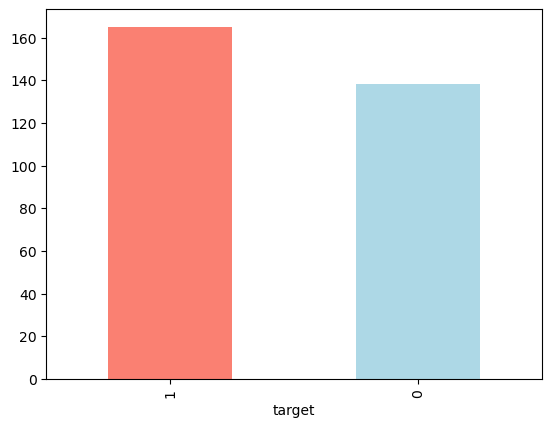

In [6]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


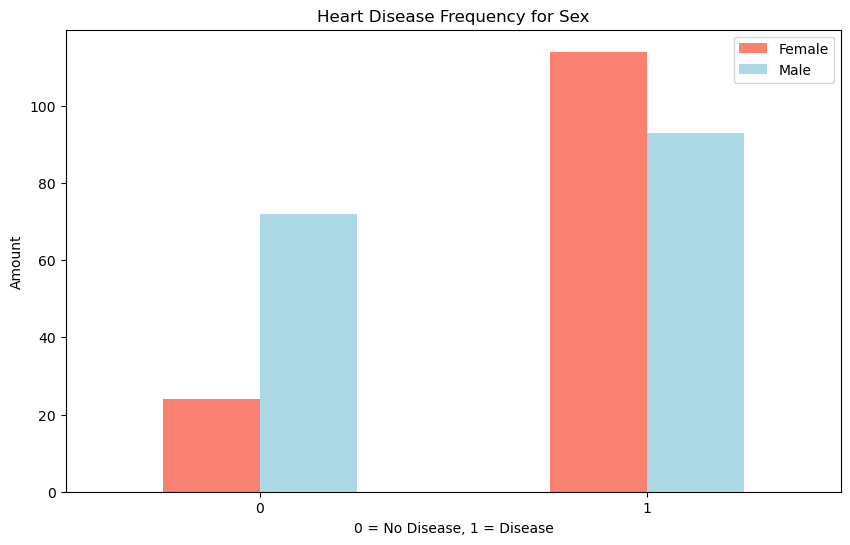

In [12]:
# Create a plot of crosstab
pd.crosstab(df.sex, df.target).plot(kind="bar",
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]
                                     );
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

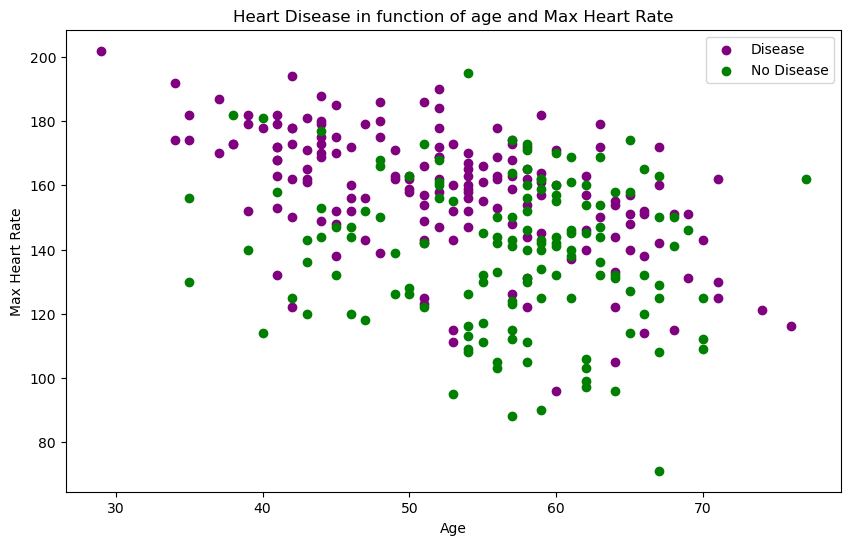

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="purple")

# Scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="green")

# Add some helpful info
plt.title("Heart Disease in function of age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [14]:
df.target[df.target == 1]

0      1
1      1
2      1
3      1
4      1
      ..
160    1
161    1
162    1
163    1
164    1
Name: target, Length: 165, dtype: int64

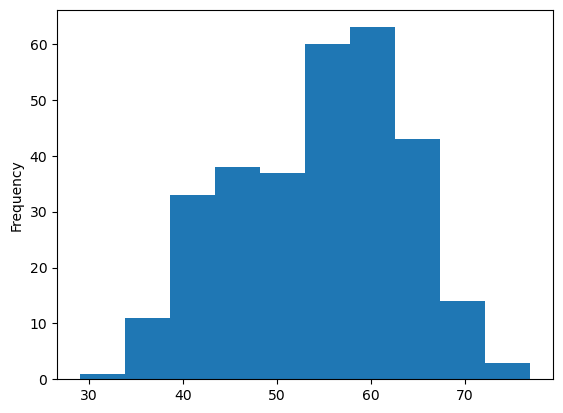

In [15]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


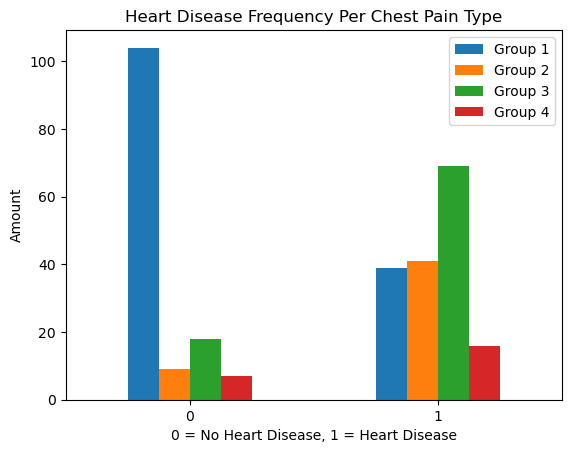

In [17]:
# Make the crosstab more visual
pd.crosstab(df.target ,df.cp).plot.bar()

# Add some Communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Group 1", "Group 2", "Group 3", "Group 4"])
plt.xticks(rotation = 0);

In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


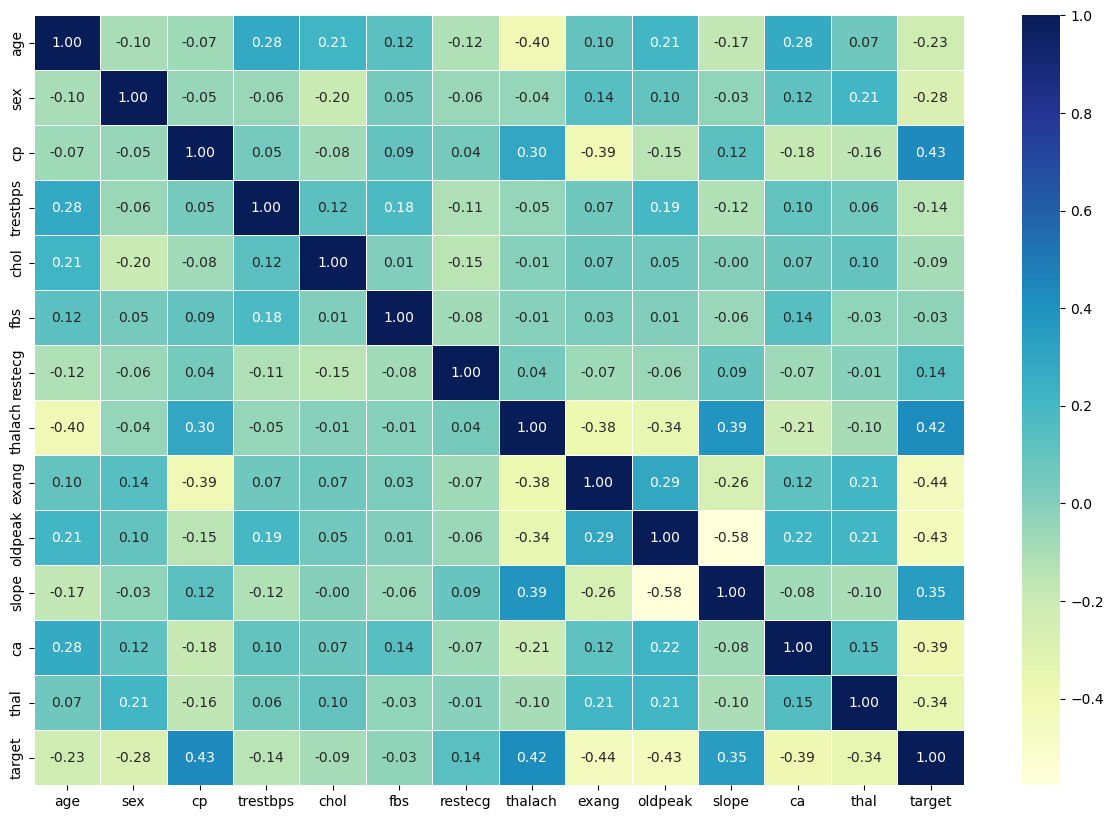

In [19]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

* A Higher positive value means a potential positive correlation
    * Like cp and target 
* A Higher negative value means a potential negative correlation or a decrease.
    * Like ca and target

* **Positive Correlation** = a relationship between two variables in which one variable **increases** as the other    **increases**
* **Negative Correlation** = a relationship between two variables in which one variable **increases** as the other    **decreases**

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = df.drop('target', axis=1)
y = df["target"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [23]:
# Create model dictionary. And score Dictionary.

my_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbours": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
}



In [24]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Fits and evaluate machine learning models
    np.random.seed(42)
    my_scores = {}
    for model_name, model in my_models.items():
        model.fit(X_train, y_train)
        my_scores[model_name] = model.score(X_test, y_test)
    return my_scores


In [25]:
model_comparison = fit_and_score(my_models, X_train, X_test, y_train, y_test)
model_comparison

C:\Users\Hp\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours': 0.5409836065573771,
 'Random Forest': 0.9016393442622951}

## Model Comparison

In [26]:
model_comparison_df = pd.DataFrame(data=model_comparison, index=["Accuracy"])
model_comparison_df

,Logistic Regression,K-Nearest Neighbours,Random Forest
Accuracy,0.885246,0.540984,0.901639


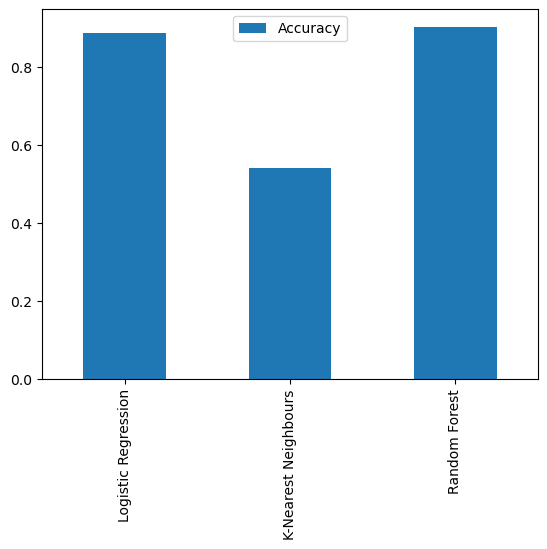

In [27]:
model_comparison_df.T.plot.bar(); # T made it transpose

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.

What should do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* Roc Curve
* Area under the curve (AUC)

## Hyperparameter Tuning


I will take the KNeighborsClassifier

In [28]:
np.random.seed(42)
# Train Scores
train_scores = []

# Test Scores
test_scores = []

# Create the variable sequence
n_neighbor_count = range(1,21)

# Create test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
# create the model that you use hyperparameter tuning
knn = KNeighborsClassifier()

# Create loop for applying each of the neighbor variable
for count in n_neighbor_count:
    knn.set_params(n_neighbors= count)
    
    # Fit the model
    knn.fit(X_train, y_train)

    # Get and fill the train score
    score_train = knn.score(X_train, y_train)
    train_scores.append(score_train)

    # Get and fill the test score
    score_test = knn.score(X_test, y_test)
    test_scores.append(score_test)


In [29]:
# Turn them into DataFrame
test_scores_df = pd.DataFrame(test_scores)
train_scores_df = pd.DataFrame(train_scores)

The maximum test score is: 75.41%


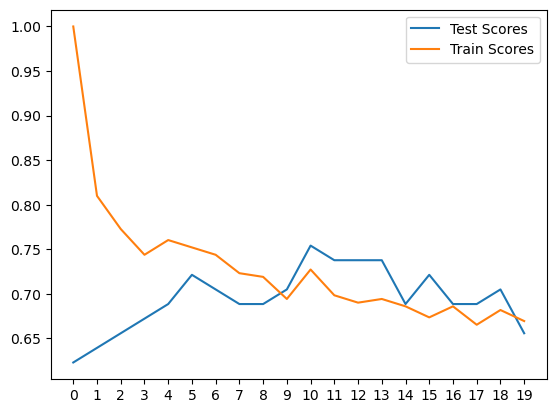

In [30]:
fig, ax = plt.subplots()
ax.plot(test_scores_df, label="Test Scores")
ax.plot(train_scores_df, label="Train Scores")
plt.xticks(range(0,20,1))
ax.legend()
print(f"The maximum test score is: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [31]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), # It divides into 20 equal part
                "solver": ["liblinear"]} 

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(100, 1000, 50),
           "max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 14, 2),
           "min_samples_leaf": np.arange(1, 14, 2),}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [32]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_logistic_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                    param_distributions=log_reg_grid,
                                    n_iter=20,
                                    cv=5,
                                    verbose=True);
rs_logistic_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_logistic_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [34]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier()
rs_forest_cf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                  param_distributions=rf_grid,
                                  n_iter=20,
                                  cv=5,
                                  verbose=True)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_forest_cf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=True)

In [35]:
rs_forest_cf.best_params_

{'n_estimators': 850,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [36]:
# Find the best hyperparameters
rs_forest_cf.score(X_test, y_test)

0.8688524590163934

There are 3 ways to **Tuning Hyperparameters**
1. By hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparamter Tuning with GridSearchCv

Since our LogisticRegression model provides the best scores so far we'll try and improve them again using GridSearchCV

In [37]:
# setup random seed
np.random.seed(42)

gs_logistic_reg = GridSearchCV(estimator=LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True,)

gs_logistic_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [38]:
gs_logistic_reg.score(X_test, y_test)

0.8852459016393442

In [39]:
## Different hyperparameters for our RandomForestClassifier model
rf_grid_2 = {"n_estimators": [100],
           "max_depth": [5],
           "min_samples_split": [10],
           "min_samples_leaf": [10]}

In [40]:
# setup random seed
np.random.seed(42)

gs_forest_class = GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=rf_grid_2,
                               cv=5,
                               verbose=True)

gs_forest_class.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'min_samples_leaf': [10],
                         'min_samples_split': [10], 'n_estimators': [100]},
             verbose=True)

In [41]:
gs_forest_class.score(X_test, y_test)

0.8524590163934426

In [42]:
gs_forest_class.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

## Evaluting our tuned machine learning classifier, beyond accuracy

*  ROC curve and AUC score
*  Confusion matrix
*  Classification report
*  Precision
*  Recall
*  F1-score

... and it would be great if cross-validation was used where possible

To make comparison and evaluate our trained model, first we need to make predictions.

In [43]:
## Make predictions with Logistic_reg
y_pred_logistic = gs_logistic_reg.predict(X_test)

In [68]:
predict_prob = gs_logistic_reg.predict_proba(X_test)
predict_prob = predict_prob[:,1]
predict_prob

array([0.12720716, 0.75561893, 0.81805545, 0.05086321, 0.89126676,
       0.87585496, 0.60343101, 0.00391257, 0.0123853 , 0.55356874,
       0.72243214, 0.1136253 , 0.89073491, 0.05502454, 0.96999245,
       0.93355215, 0.96648601, 0.09044344, 0.01598865, 0.02435383,
       0.71543835, 0.02463083, 0.14180287, 0.72743769, 0.88728493,
       0.69406611, 0.8475707 , 0.68823806, 0.01663043, 0.88249527,
       0.06724069, 0.06227773, 0.01375287, 0.13466564, 0.61434788,
       0.11945336, 0.66243628, 0.85382763, 0.81935236, 0.84133741,
       0.54292123, 0.79498143, 0.78219397, 0.70346846, 0.8340174 ,
       0.01849793, 0.73609759, 0.93520949, 0.10035362, 0.05894718,
       0.12563902, 0.0315079 , 0.80940048, 0.95666843, 0.30632915,
       0.00278635, 0.08198472, 0.94122506, 0.02642007, 0.01161936,
       0.05904859])

In [44]:
y_pred_logistic

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

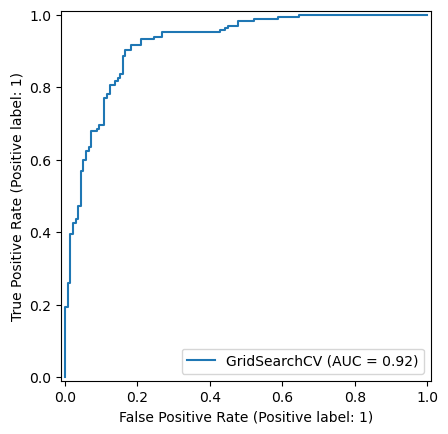

In [59]:
# Plot ROC curve and calculate and calculate AUC metric

roc_curve_display = RocCurveDisplay.from_estimator(estimator=gs_logistic_reg, X=X, y=y);


In [69]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predict_prob)

0.9245689655172414

In [75]:
confusion_matrix(y_test, y_pred_logistic)

array([[25,  4],
       [ 3, 29]], dtype=int64)

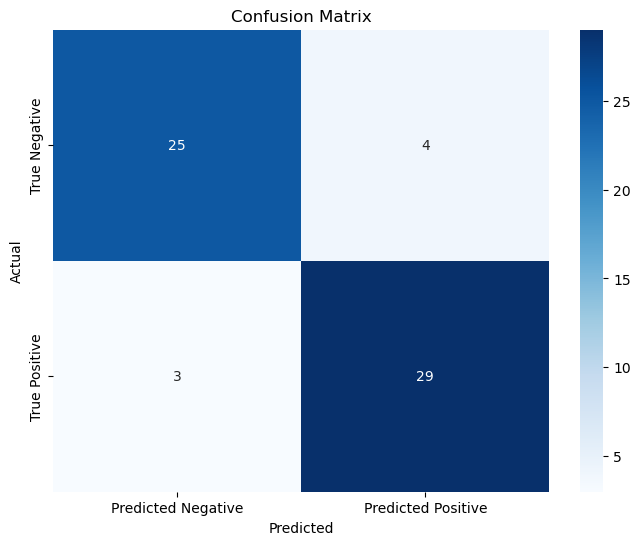

In [77]:
def conf_matrix_display(y_test, y_preds):
    conf_matx1 = confusion_matrix(y_test, y_preds)
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(conf_matx1,
                     annot=True,
                     cmap='Blues',
                     cbar=True,
                     xticklabels=['Predicted Negative', 'Predicted Positive'],
                     yticklabels=['True Negative', 'True Positive']
                    )
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')

conf_matrix_display(y_test, y_pred_logistic)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [79]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do we'll be using cross_val_score()

In [86]:
# accuracy score
accuracy = np.mean(cross_val_score(gs_logistic_reg, X, y, cv=5, scoring="accuracy"))
accuracy

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8446448087431694

In [87]:
# precision score
precision = np.mean(cross_val_score(gs_logistic_reg, X, y, cv=5, scoring="precision"))
precision

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8207936507936507

In [88]:
# recall score
recall = np.mean(cross_val_score(gs_logistic_reg, X, y, cv=5, scoring="recall"))
recall

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.9212121212121213

In [91]:
# f1 score
f1 = np.mean(cross_val_score(gs_logistic_reg, X, y, cv=5, scoring="f1"))
f1

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8673007976269721

In [107]:
df_cross_validation = pd.DataFrame(data={
                                    "Accuracy": accuracy,
                                    "Precision": precision,
                                    "Recall": recall,
                                    "F1": f1,
                                    },
                                   index=[0])

df_cross_validation

,Accuracy,Precision,Recall,F1
0,0.844645,0.820794,0.921212,0.867301


<Axes: >

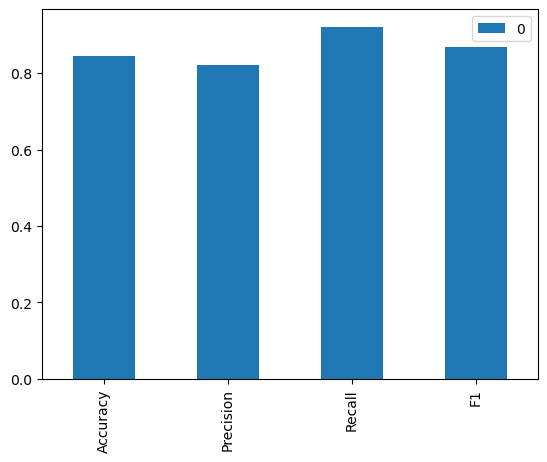

In [136]:
df_cross_validation.T.plot.bar()

### Feature Importance

Feature importance is another as way asking, which features contributed most to the outcomes of the model and how did they contribute ?

Finding feature importance is different for each machine learning model.
One way to find feature importance is to search for **"(MODEL NAME) feature importance".**

Let's find the feature importance for our Logisticregression model...

In [138]:
# Fit an instance of LogisticRegression

gs_logistic_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [140]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [141]:
# Check coef (coefficient)
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490195,  0.02472938, -0.63120405, -0.57590942,
         0.47095136, -0.65165348, -0.69984206]])

In [143]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699220351664148,
 'sex': -0.9042408930260735,
 'cp': 0.6747282624694215,
 'trestbps': -0.011613401789010375,
 'chol': -0.0017036441780094993,
 'fbs': 0.047876883382302414,
 'restecg': 0.3349019539205334,
 'thalach': 0.024729383396378347,
 'exang': -0.6312040510578483,
 'oldpeak': -0.5759094230155162,
 'slope': 0.47095135616471195,
 'ca': -0.6516534832909596,
 'thal': -0.6998420628111434}

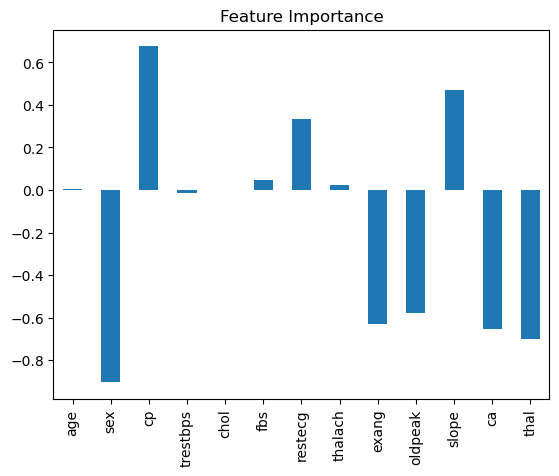

In [145]:
# Visulize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [148]:
 pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [149]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [152]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric how would you export it and share it with others?)